In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import scipy

In [50]:
def simulate_trial(step_dist, rotate_theta):
    steps = np.array([0, 0])
    current = np.array([0, 0])
    target = np.array([500, 500])

    dist_target = target - current
    diff_target, diff_theta = np.hypot(dist_target[0], dist_target[1]), np.arctan2(dist_target[1], dist_target[0]) 
    penalty = 0
    while np.linalg.norm(diff_target) > 10:
        step_theta = diff_theta + rotate_theta
        step_x, step_y = step_dist*diff_target*np.cos(step_theta), step_dist*diff_target*np.sin(step_theta)
        
        #print (step_x, step_y)
        current = current + np.array([step_x, step_y])
        #print (current)
        steps = np.row_stack((steps, current))
        dist_target = target - current
        diff_target, diff_theta = np.hypot(dist_target[0], dist_target[1]), np.arctan2(dist_target[1], dist_target[0]) 
        
        #print (current)
        penalty = penalty + 1
    num_steps=len(steps[:, 1])
    accuracy=max(abs(steps[:, 0])) + max(abs(steps[:, 1])) + penalty
    plt.scatter(steps[:, 0], steps[:, 1])
    return accuracy

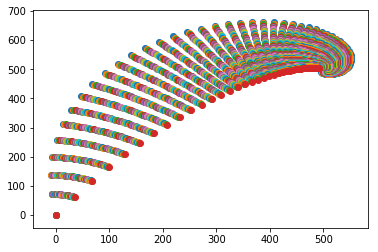

In [51]:
rotate_theta = 0.9
correct_theta = 0
step_dist = 0.1
correct_by = 0.01

for i in range(64):
    reward = simulate_trial(step_dist, rotate_theta - correct_theta)
    if reward > 50:
        #print (correct_theta)
        correct_theta = correct_theta + correct_by
        

17575.682347886377

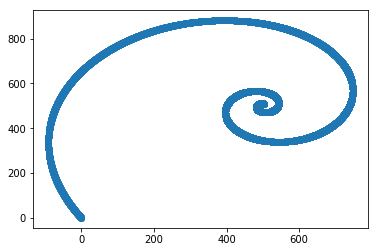

In [60]:
simulate_trial(0.001, 1.3)

4375.048343812512

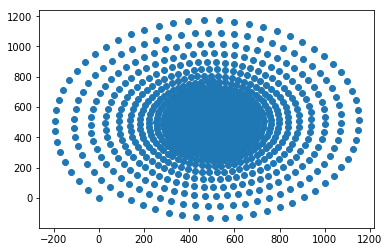